<a href="https://colab.research.google.com/github/MwangiMwaniki/Flight-time-optimization-/blob/main/Moringa_Data_Science_Prep_Aviators_Group_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing python libraries
import pandas as pd
import numpy as np

##LOADING DATASETS

In [ ]:
# load our dataset
df = pd.read_csv('flights.csv')
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589.0,604.0,6.0,602.0,610.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299.0,504.0,5.0,526.0,509.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125.0,745.0,8.0,803.0,753.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464.0,529.0,3.0,545.0,532.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747.0,651.0,5.0,711.0,656.0,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cheking total rows and columns we have on our original dataset
df.shape

(2748980, 31)

In [ ]:
#exporting the CSV FILE
#Trimed_Flights_data = df.head(1000000)
#Trimed_Flights_data.to_csv('Trimed_Flights_data.csv')

In [ ]:
df1 = pd.read_csv('Trimed_Flights_data.csv')
df1.head(10)

,Index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking our rows and columns
df1.shape

(1000000, 32)

##CLEANING DATASET

In [ ]:
# checking on columns
df1.columns

Index(['Index', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
#Change all column names to lower case
df1.columns = map(str.lower, df1.columns)
df1.columns

Index(['index', 'year', 'month', 'day', 'day_of_week', 'airline',
       'flight_number', 'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
df1.drop(['tail_number', 'taxi_out',
       'wheels_off', 'air_time', 
       'wheels_on','taxi_in'],axis= 1, inplace = True)


In [ ]:
#New columns after dropping
df1.columns

Index(['index', 'year', 'month', 'day', 'day_of_week', 'airline',
       'flight_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay',
       'scheduled_time', 'elapsed_time', 'distance', 'scheduled_arrival',
       'arrival_time', 'arrival_delay', 'diverted', 'cancelled',
       'cancellation_reason', 'air_system_delay', 'security_delay',
       'airline_delay', 'late_aircraft_delay', 'weather_delay'],
      dtype='object')

In [ ]:
# check for null values
df1.isnull().any()

index                  False
year                   False
month                  False
day                    False
day_of_week            False
airline                False
flight_number          False
origin_airport         False
destination_airport    False
scheduled_departure    False
departure_time          True
departure_delay         True
scheduled_time          True
elapsed_time            True
distance               False
scheduled_arrival      False
arrival_time            True
arrival_delay           True
diverted               False
cancelled              False
cancellation_reason     True
air_system_delay        True
security_delay          True
airline_delay           True
late_aircraft_delay     True
weather_delay           True
dtype: bool

In [ ]:
#The null values in our dataset have to be treated differently
#Replacing null values Nan with  Zero on specific  columns
df1['air_system_delay']= df1['air_system_delay'].fillna(0)
df1['security_delay'] = df1['security_delay'].fillna(0)
df1['airline_delay'] = df1['airline_delay'].fillna(0)
df1['late_aircraft_delay'] = df1['late_aircraft_delay'].fillna(0)
df1['weather_delay'] = df1['weather_delay'].fillna(0) 
df1['cancellation_reason'] = df1['cancellation_reason'].fillna(0) 
df1.head(10)

,index,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,distance,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,1448,430,408.0,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,2330,750,741.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,2296,806,811.0,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,2342,805,756.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,1448,320,259.0,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0
5,5,2015,1,1,4,DL,806,SFO,MSP,25,20.0,-5.0,217.0,230.0,1589,602,610.0,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0
6,6,2015,1,1,4,NK,612,LAS,MSP,25,19.0,-6.0,181.0,170.0,1299,526,509.0,-17.0,0,0,0,0.0,0.0,0.0,0.0,0.0
7,7,2015,1,1,4,US,2013,LAX,CLT,30,44.0,14.0,273.0,249.0,2125,803,753.0,-10.0,0,0,0,0.0,0.0,0.0,0.0,0.0
8,8,2015,1,1,4,AA,1112,SFO,DFW,30,19.0,-11.0,195.0,193.0,1464,545,532.0,-13.0,0,0,0,0.0,0.0,0.0,0.0,0.0
9,9,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,221.0,203.0,1747,711,656.0,-15.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# droped the remaining null values that were affecting time
df1 = df1.dropna()

In [38]:
# check if there are any more null values
df1.isnull().any()

index                  False
year                   False
month                  False
day                    False
day_of_week            False
airline                False
flight_number          False
origin_airport         False
destination_airport    False
scheduled_departure    False
departure_time         False
departure_delay        False
scheduled_time         False
elapsed_time           False
distance               False
scheduled_arrival      False
arrival_time           False
arrival_delay          False
diverted               False
cancelled              False
cancellation_reason    False
air_system_delay       False
security_delay         False
airline_delay          False
late_aircraft_delay    False
weather_delay          False
dtype: bool

In [ ]:
# preview our columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957394 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                957394 non-null  int64  
 1   year                 957394 non-null  int64  
 2   month                957394 non-null  int64  
 3   day                  957394 non-null  int64  
 4   day_of_week          957394 non-null  int64  
 5   airline              957394 non-null  object 
 6   flight_number        957394 non-null  int64  
 7   origin_airport       957394 non-null  object 
 8   destination_airport  957394 non-null  object 
 9   scheduled_departure  957394 non-null  int64  
 10  departure_time       957394 non-null  float64
 11  departure_delay      957394 non-null  float64
 12  scheduled_time       957394 non-null  float64
 13  elapsed_time         957394 non-null  float64
 14  distance             957394 non-null  int64  
 15  scheduled_arrival

In [ ]:
#Check for duplicated rows
df1.duplicated()
#There were no duplicates in this dataset

,index,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,distance,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,1448,430,408.0,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,2330,750,741.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,2296,806,811.0,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,2342,805,756.0,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,1448,320,259.0,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015,3,7,6,OO,6396,BOI,SFO,915,912.0,-3.0,118.0,105.0,522,1013,957.0,-16.0,0,0,0,0.0,0.0,0.0,0.0,0.0
999996,999996,2015,3,7,6,AA,334,DFW,MFE,916,919.0,3.0,94.0,83.0,469,1050,1042.0,-8.0,0,0,0,0.0,0.0,0.0,0.0,0.0
999997,999997,2015,3,7,6,MQ,3641,DSM,DFW,916,939.0,23.0,124.0,112.0,624,1120,1131.0,11.0,0,0,0,0.0,0.0,0.0,0.0,0.0
999998,999998,2015,3,7,6,OO,5244,LAX,ASE,916,915.0,-1.0,120.0,147.0,737,1216,1242.0,26.0,0,0,0,26.0,0.0,0.0,0.0,0.0


In [ ]:
# check for unique values
df1.nunique()
#No anomalies in our dataset

index                  957394
year                        1
month                       3
day                        31
day_of_week                 7
airline                    14
flight_number            6474
origin_airport            315
destination_airport       315
scheduled_departure      1220
departure_time           1431
departure_delay           845
scheduled_time            455
elapsed_time              681
distance                 1263
scheduled_arrival        1332
arrival_time             1440
arrival_delay             870
diverted                    1
cancelled                   1
cancellation_reason         1
air_system_delay          394
security_delay             87
airline_delay             662
late_aircraft_delay       504
weather_delay             462
dtype: int64

In [39]:
# exporting the clean dataset
df1.to_csv('Aviation_clean.csv')



##DATA ANALYSIS

###**which airports were prone to delays**
*we count all airline	 where arrival_delay > 0*

**A) Arrivals**

In [ ]:
#Interms of Time 
airports_delay=df1[df1['arrival_delay']> 0]

pd.DataFrame(airports_delay.groupby(airports_delay["destination_airport"])["arrival_delay"].sum().sort_values(ascending=False))


,arrival_delay
destination_airport,
ORD,1053452.0
DFW,784661.0
ATL,764688.0
DEN,572782.0
LAX,482743.0
...,...
CNY,277.0
VEL,147.0
PPG,104.0


In [ ]:
#Interms of Incidences
airports_delay=df1[df1['arrival_delay']> 0]

pd.DataFrame(airports_delay.groupby(airports_delay["destination_airport"])["arrival_delay"].count().sort_values(ascending=False))

,arrival_delay
destination_airport,
ORD,24170
ATL,21338
DFW,19657
DEN,15837
LAX,14682
...,...
BGR,13
CNY,12
PPG,10


**Graphical Presentation**

### **Quiz 1 Air_Ports**


**A) Arrivals**

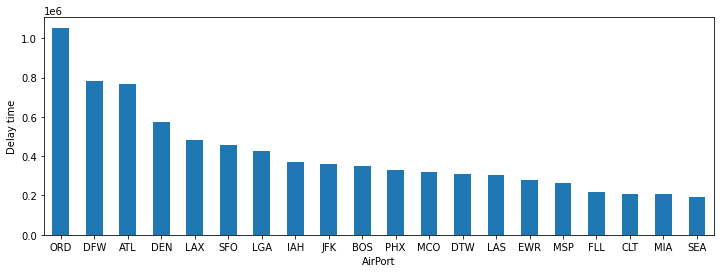

In [ ]:
import matplotlib.pyplot as plt

#Interms of incidence Time
fig, axs = plt.subplots(figsize=(12, 4))

airports_delay=df1[df1['arrival_delay']> 0]
airports_delay.groupby(airports_delay["destination_airport"])["arrival_delay"].sum().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("AirPort");  # custom x label using matplotlib

plt.ylabel("Delay time");

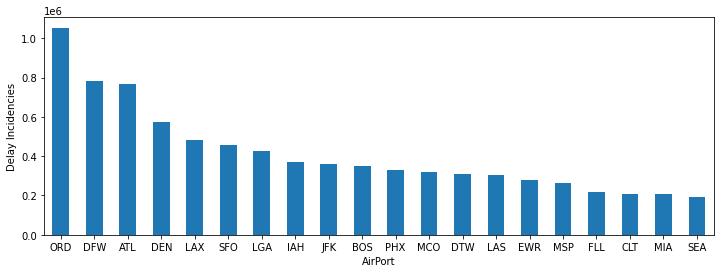

In [ ]:
#Interms of incidence count
fig, axs = plt.subplots(figsize=(12, 4))

airports_delay=df1[df1['arrival_delay']> 0]
airports_delay.groupby(airports_delay["destination_airport"])["arrival_delay"].sum().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("AirPort");  # custom x label using matplotlib

plt.ylabel("Delay Incidencies");

**B) Depatures**

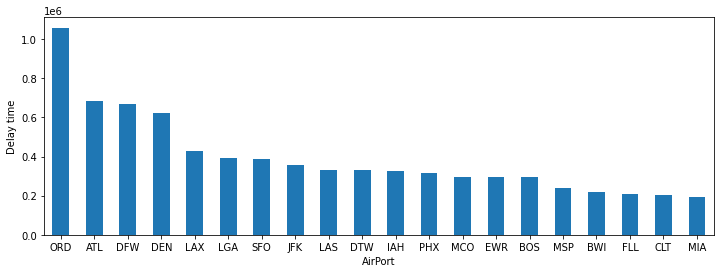

In [ ]:
#Depatures Interms of Time
fig, axs = plt.subplots(figsize=(12, 4))

airports_departure_delay=df1[df1['departure_delay']> 0]
airports_departure_delay.groupby(airports_departure_delay["origin_airport"])["departure_delay"].sum().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("AirPort");  # custom x label using matplotlib

plt.ylabel("Delay time");

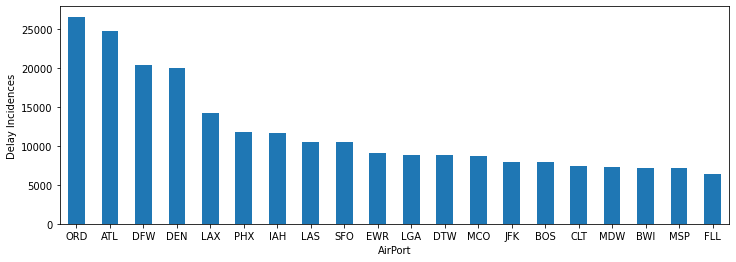

In [ ]:
#Depatures Interms of count
fig, axs = plt.subplots(figsize=(12, 4))

airports_departure_delay=df1[df1['departure_delay']> 0]
airports_departure_delay.groupby(airports_departure_delay["origin_airport"])["departure_delay"].count().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("AirPort");  # custom x label using matplotlib

plt.ylabel("Delay Incidences");

###**Quiz 2 Specific AIR LINE**

**A)Depatures**

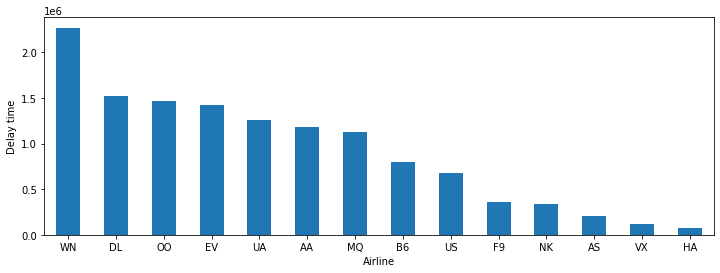

In [ ]:
#Depatures  for a specific Air_Line Interms of Time

fig, axs = plt.subplots(figsize=(12, 4))

airports_departure_delay=df1[df1['departure_delay']> 0]

airports_departure_delay.groupby(airports_delay["airline"])["departure_delay"].sum().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Airline");  # custom x label using matplotlib

plt.ylabel("Delay time");

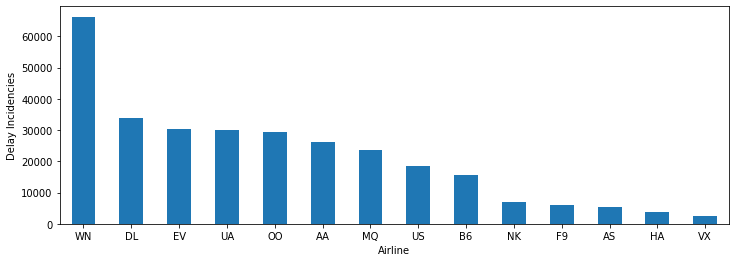

In [ ]:
#Depatures  for a specific Air_Line Interms of Incidences

fig, axs = plt.subplots(figsize=(12, 4))

airports_departure_delay=df1[df1['departure_delay']> 0]
airports_departure_delay.groupby(airports_delay["airline"])["departure_delay"].count().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Airline");  # custom x label using matplotlib

plt.ylabel("Delay Incidencies");

**B)Arrivals**

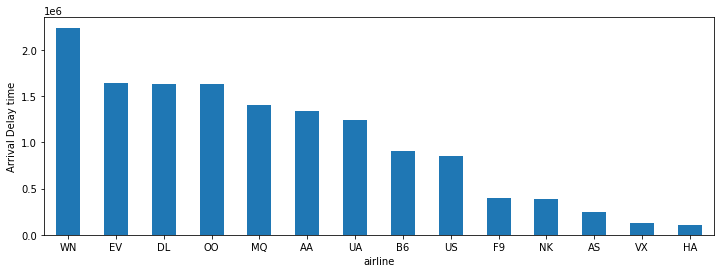

In [ ]:
#Arrivals  for a specific Air_Line Interms of Time

fig, axs = plt.subplots(figsize=(12, 4))

airports_delay=df1[df1['arrival_delay']> 0]
airports_delay.groupby(airports_delay["airline"])["arrival_delay"].sum().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("airline");  # custom x label using matplotlib

plt.ylabel("Arrival Delay time");

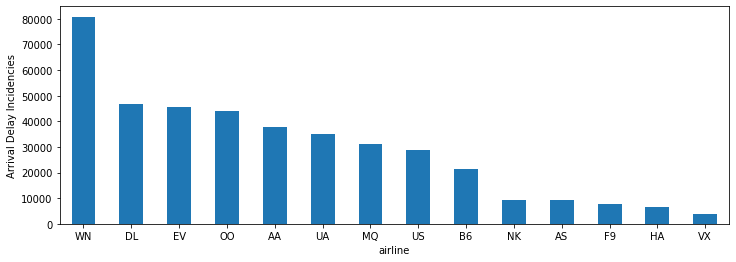

In [ ]:
#Arrivals  for a specific Air_Line Interms of Incidencies

fig, axs = plt.subplots(figsize=(12, 4))

airports_delay=df1[df1['arrival_delay']> 0]
airports_delay.groupby(airports_delay["airline"])["arrival_delay"].count().sort_values(ascending=False).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("airline");  # custom x label using matplotlib

plt.ylabel("Arrival Delay Incidencies");

###**Quiz 3 Delays per Day of the Week**

**A) Arrival**

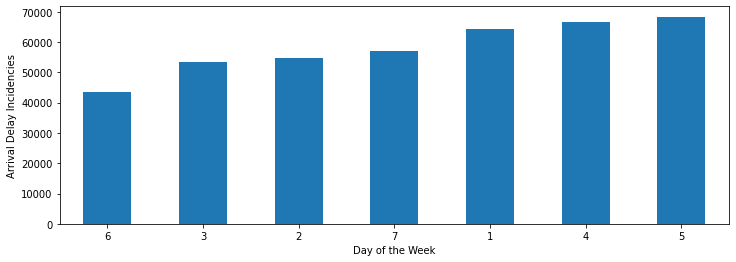

In [ ]:
#Arrivals  for a specific day of the week Interms of Incidencies

fig, axs = plt.subplots(figsize=(12, 4))

airports_delay=df1[df1['arrival_delay']> 0]
airports_delay.groupby(airports_delay["day_of_week"])["arrival_delay"].count().sort_values(ascending=True).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Day of the Week");  # custom x label using matplotlib

plt.ylabel("Arrival Delay Incidencies");

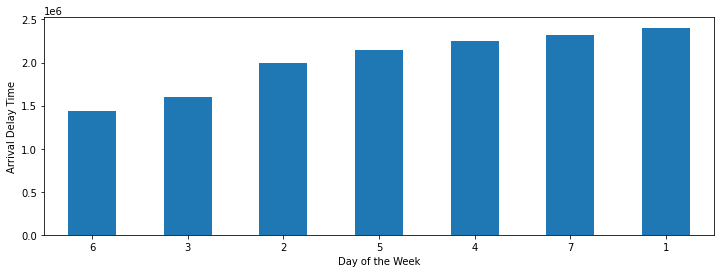

In [ ]:
#Arrivals  for a specific day of the week Interms of Time

fig, axs = plt.subplots(figsize=(12, 4))

airports_delay=df1[df1['arrival_delay']> 0]
airports_delay.groupby(airports_delay["day_of_week"])["arrival_delay"].sum().sort_values(ascending=True).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Day of the Week");  # custom x label using matplotlib

plt.ylabel("Arrival Delay Time");

**B)Depatures**

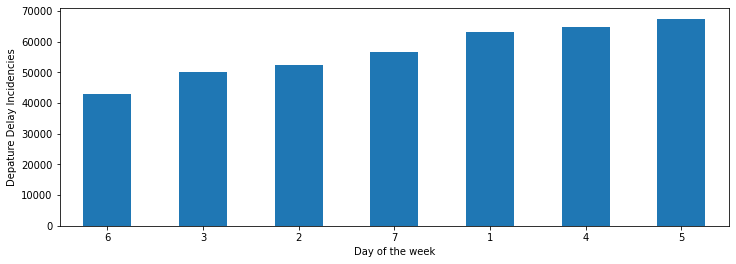

In [ ]:
#Depatures  for a specific day of the week in terms of Incidences

fig, axs = plt.subplots(figsize=(12, 4))

airports_departure_delay=df1[df1['departure_delay']> 0]
airports_departure_delay.groupby(airports_departure_delay["day_of_week"])["departure_delay"].count().sort_values(ascending=True).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Day of the week");  # custom x label using matplotlib

plt.ylabel("Depature Delay Incidencies");

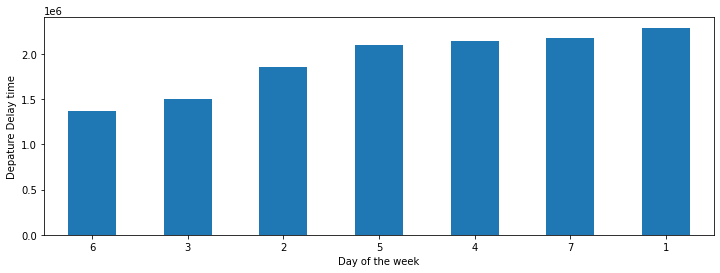

In [ ]:
#Depatures  for a specific day of the week in terms of Time

fig, axs = plt.subplots(figsize=(12, 4))

airports_departure_delay=df1[df1['departure_delay']> 0]
airports_departure_delay.groupby(airports_departure_delay["day_of_week"])["departure_delay"].sum().sort_values(ascending=True).head(20).plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Day of the week");  # custom x label using matplotlib

plt.ylabel("Depature Delay time");

###**Quiz 4(a) Relative Depature delay  AirPort**

In [ ]:
#airports_departure_delay=df1[df1['departure_delay']> 0]
Mean_delay_time=airports_departure_delay.groupby(airports_departure_delay["origin_airport"])["departure_delay"].mean()
pd.DataFrame(Mean_delay_time.sort_values(ascending=False).head(20))


,departure_delay
origin_airport,
VEL,164.375000
PIH,135.500000
BGR,125.750000
PLN,121.136364
ABR,100.285714
BJI,99.187500
INL,95.631579
ESC,95.217391
SMX,94.657143


###**Quiz 4 (b) Relative Depature delay Time Air Line**

In [ ]:
#airports_departure_delay=df1[df1['departure_delay']> 0]
Mean_delay_time=airports_departure_delay.groupby(airports_departure_delay["airline"])["departure_delay"].mean()
pd.DataFrame(Mean_delay_time.sort_values(ascending=False).head(20))


,departure_delay
airline,
F9,53.962710
MQ,43.530810
OO,43.015692
B6,42.817037
NK,41.500891
EV,40.261466
AA,35.667925
VX,35.529562
DL,31.662137


###**Quiz 4 (c) Relative Arrival delay Airport**

In [ ]:
airports_arrival_delay=df1[df1['arrival_delay']> 0]
Mean_delay_time_Arrival_Airport=airports_arrival_delay.groupby(airports_arrival_delay["destination_airport"])["arrival_delay"].mean()
pd.DataFrame(Mean_delay_time_Arrival_Airport.sort_values(ascending=False)).head(15)

,arrival_delay
destination_airport,
TTN,67.642857
MQT,61.611111
PLN,57.740000
APN,56.695652
CMI,53.737069
WRG,53.694444
COU,52.936170
MKG,52.875000
PSG,52.425532


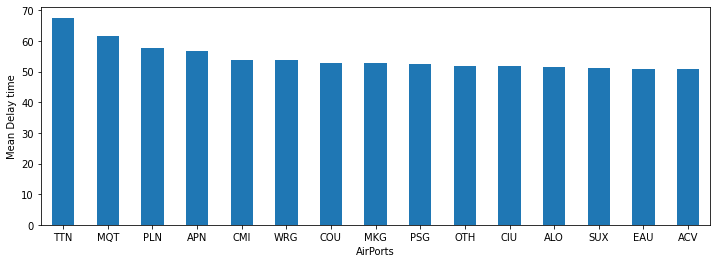

In [ ]:
#Graph  Mean Arrival delay Air Line

fig, axs = plt.subplots(figsize=(12, 4))
Mean_delay_time_Arrival_Airport.sort_values(ascending=False).head(15).plot(kind='bar', rot=0, ax=axs)
plt.xlabel("AirPorts");  # custom x label using matplotlib

plt.ylabel("Mean Delay time");

###**Quiz 4 (d) Mean Arrival delay Air Line**

In [ ]:
airports_arrival_delay=df1[df1['arrival_delay']> 0]
Mean_delay_time_Arrival=airports_arrival_delay.groupby(airports_arrival_delay["airline"])["arrival_delay"].mean()
pd.DataFrame(Mean_delay_time_Arrival.sort_values(ascending=False))

,arrival_delay
airline,
F9,50.890099
MQ,45.063235
B6,42.744953
NK,41.017456
OO,36.864798
EV,36.092792
AA,35.573638
UA,35.436628
VX,34.985691


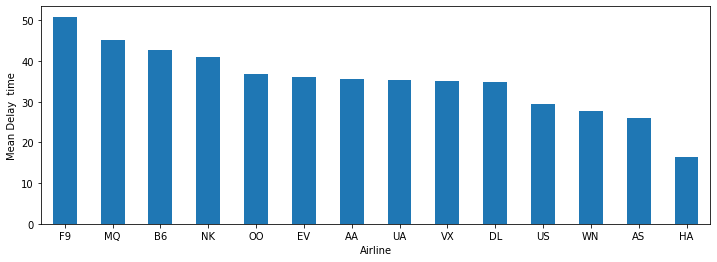

In [ ]:
#Graph  Mean Arrival delay Air Line

fig, axs = plt.subplots(figsize=(12, 4))
Mean_delay_time_Arrival.sort_values(ascending=False).plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Airline");  # custom x label using matplotlib

plt.ylabel("Mean Delay  time");

#General Specified Causes of Delay

In [ ]:
#General causes of delay
airports_arrival_delay=df1[df1['arrival_delay']> 0]

Cumulatives_delays=airports_departure_delay.groupby(airports_departure_delay["origin_airport"]).sum(numeric_only=True)



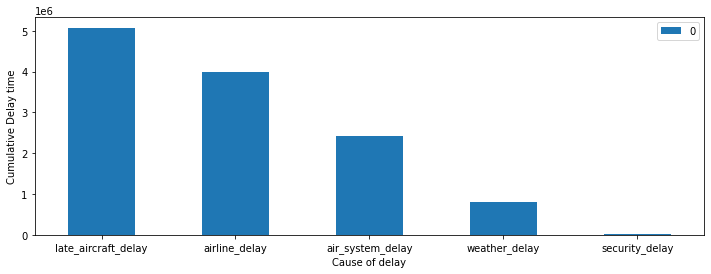

In [ ]:
airports_arrival_delay=df1[df1['arrival_delay']> 0]
Cumulatives_delaysb=pd.DataFrame(airports_departure_delay[['air_system_delay','security_delay','airline_delay','late_aircraft_delay','weather_delay']])#.sum(numeric_only=True)
Cumulatives_delaysb=pd.DataFrame(Cumulatives_delaysb.sum(numeric_only=True).sort_values(ascending=False))
Cumulatives_delaysb

fig, axs = plt.subplots(figsize=(12, 4))
Cumulatives_delaysb.plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Cause of delay");  # custom x label using matplotlib

plt.ylabel("Cumulative Delay time");
